Files already downloaded and verified
Files already downloaded and verified


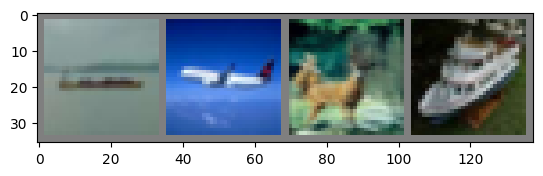

ship  plane deer  ship 


In [1]:
from model import Net, train
from data import *
from utils import imshow

In [3]:
from distributed_setup import run, prep_data

model = Net()

run(model, train, trainset, batch_size)

Running on  4 cuda:0
Files already downloaded and verified
Files already downloaded and verified
distributed_training on: 0
Files already downloaded and verified
Files already downloaded and verified
distributed_training on: 1
Files already downloaded and verified
Files already downloaded and verified
distributed_training on: 2
Files already downloaded and verified
Files already downloaded and verified
distributed_training on: 3


ProcessRaisedException: 

-- Process 0 terminated with the following error:
Traceback (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/multiprocessing/spawn.py", line 69, in _wrap
    fn(i, *args)
  File "/project/studios/this_studio/image_classifier/distributed_setup.py", line 34, in distributed_training
    sampled_dataloader = prep_data(dataset, world_size, rank)
  File "/project/studios/this_studio/image_classifier/distributed_setup.py", line 28, in prep_data
    return DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2, sampler=sampler) # type: ignore
NameError: name 'DataLoader' is not defined


In [ ]:
PATH = './cifar_net_gpu.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

In [ ]:
test(device)